# DATA DIRI
- Nama: Muhammad Shodiq Fathoni
- Email: shodiqfathoni3@gmail.com
- Id Dicoding: shodiq29

# project Membuat Model NLP dengan TensorFlow

### langkah 1 : memasukkan data set rental mobil dan menghapus kolom yang tidak diperlukan

In [97]:
import pandas as pd
df = pd.read_csv('/content/CarRentalData.csv')
df = df.drop(columns=['fuelType', 'rating', 'renterTripsTaken', 'reviewCount',
                      'location.country', 'location.latitude',
                      'location.longitude', 'location.state', 'owner.id', 'rate.daily',
                      'location.city', 'vehicle.model', 'vehicle.year'])
df.tail()


,vehicle.make,vehicle.type
5846,Chevrolet,car
5847,Lexus,car
5848,smart,car
5849,GMC,van
5850,smart,car


### langkah 2 : mengganti nama kolom agar tidak terjadi error saat coding

In [98]:
df = df.rename(columns={'vehicle.make': 'brand', 'vehicle.type': 'type_car'})
df.tail()

,brand,type_car
5846,Chevrolet,car
5847,Lexus,car
5848,smart,car
5849,GMC,van
5850,smart,car


### langkah 3 : mendefinisikan ulang kategori tipe mobil

In [99]:
def tipe_categories(category):
    if category=='car' or category=='suv':
        return 'suv'
    elif category=='van':
        return 'van'
    elif category=='minivan':
        return 'minivan'
    else:
        return 'truck'

df['type_car']=df['type_car'].apply(tipe_categories)

### langkah 4 : mendetailkan kondisi jika terpenuhi adalah 1 dan tidak 0

In [100]:
category = pd.get_dummies(df.type_car)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='type_car')
df_baru

,brand,minivan,suv,truck,van
0,Tesla,0,1,0,0
1,Tesla,0,1,0,0
2,Toyota,0,1,0,0
3,Ford,0,1,0,0
4,Chrysler,0,1,0,0
...,...,...,...,...,...
5846,Chevrolet,0,1,0,0
5847,Lexus,0,1,0,0
5848,smart,0,1,0,0
5849,GMC,0,0,0,1


### langkah 5 : mendefinisikan deskripsi dan label yang akan di klasifikasi

In [101]:
brand = df_baru['brand'].values
label = df_baru[['minivan','suv','truck','van']].values

### langkah 6 : membagi validation set sebesar 20% dari total data

In [102]:
from sklearn.model_selection import train_test_split
brand_latih, brand_test, label_latih, label_test = train_test_split(brand, label, test_size=0.2)

### langkah 7 : gunakan tokenizer untuk memproses larik deskripsi diatas menjadi token numerik

In [103]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(brand_latih)


sekuens_latih = tokenizer.texts_to_sequences(brand_latih)
sekuens_test = tokenizer.texts_to_sequences(brand_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

### langkah 8 : membuat layer embedding,LSTM dan ditambah dropout

In [104]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, recurrent_dropout=0.2,return_sequences=True)),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### langkah 9 : membuat callback dengan akurasi > 90%

In [105]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

### langkah 10 : membuat model fit dengan jumlah epochs 30

In [106]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test),
                    batch_size=128,
                    steps_per_epoch=25,
                    validation_steps=5,
                    verbose=2,callbacks=[callbacks])

Epoch 1/30
25/25 - 12s - loss: 1.2406 - accuracy: 0.8844 - val_loss: 0.8962 - val_accuracy: 0.9109 - 12s/epoch - 466ms/step
Epoch 2/30
25/25 - 1s - loss: 0.5599 - accuracy: 0.9122 - val_loss: 0.4220 - val_accuracy: 0.9109 - 546ms/epoch - 22ms/step
Epoch 3/30
25/25 - 1s - loss: 0.4372 - accuracy: 0.9167 - val_loss: 0.3607 - val_accuracy: 0.9109 - 554ms/epoch - 22ms/step
Epoch 4/30
25/25 - 1s - loss: 0.3830 - accuracy: 0.9159 - val_loss: 0.3327 - val_accuracy: 0.9109 - 564ms/epoch - 23ms/step
Epoch 5/30
25/25 - 1s - loss: 0.3455 - accuracy: 0.9176 - val_loss: 0.3244 - val_accuracy: 0.9109 - 565ms/epoch - 23ms/step
Epoch 6/30
25/25 - 1s - loss: 0.3365 - accuracy: 0.9154 - val_loss: 0.3200 - val_accuracy: 0.9109 - 573ms/epoch - 23ms/step
Epoch 7/30
25/25 - 1s - loss: 0.3288 - accuracy: 0.9187 - val_loss: 0.3236 - val_accuracy: 0.9109 - 549ms/epoch - 22ms/step
Epoch 8/30
25/25 - 1s - loss: 0.3177 - accuracy: 0.9173 - val_loss: 0.3209 - val_accuracy: 0.9109 - 567ms/epoch - 23ms/step
Epoch 9/

### langkah 11 : membuat plot accuracy dan loss

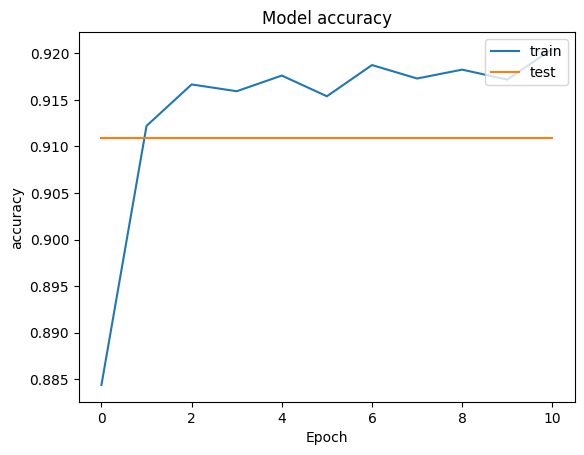

In [107]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

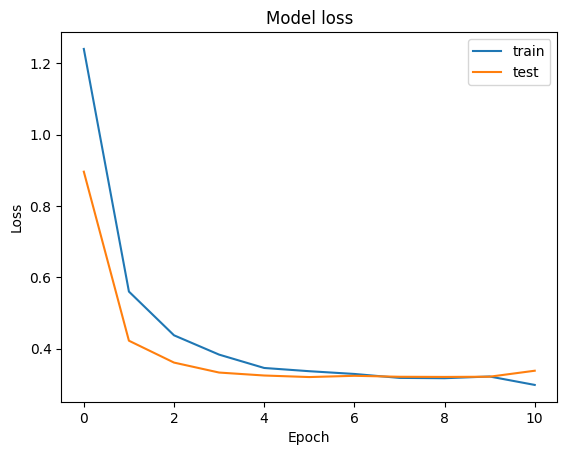

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()